<a href="https://colab.research.google.com/github/naveenk-DS/Microsoft_classification/blob/main/Microsoft_Classifying_Cybersecurity_Incidents_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df =pd.read_csv('/content/new_train_sample.csv')
test_df =pd.read_csv('/content/GUIDE_Test.csv')
print("Train_data:", train_df.head())
print("Test_data:", test_df.head())

Train_data:    Unnamed: 0            Id  OrgId  IncidentId    AlertId  \
0     5172780  1.709400e+12     26     18583.0   687462.0   
1     8470561  9.277130e+11     33      5065.0     3990.0   
2     5897583  1.090920e+12    201    150787.0   807590.0   
3     3288552  1.434520e+12    204    108287.0    28575.0   
4     4060961  1.005020e+12     54    528202.0  1458226.0   

                  Timestamp  DetectorId  AlertTitle            Category  \
0  2024-06-06T05:56:47.000Z        31.0       813.0             Malware   
1  2024-06-03T10:45:09.000Z        38.0        25.0              Impact   
2  2024-06-13T03:36:40.000Z       419.0       444.0           Execution   
3  2024-06-08T16:54:57.000Z        44.0      1233.0  SuspiciousActivity   
4  2024-06-09T02:48:01.000Z       102.0     58829.0        Exfiltration   

                                     MitreTechniques  ... ResourceType  \
0                                                NaN  ...          NaN   
1                     

# **Data Inspection**

In [3]:
print("Null_Value:", train_df.isnull().sum())
print("Null_value:", test_df.isnull().sum())

Null_Value: Unnamed: 0                 0
Id                         0
OrgId                      0
IncidentId                 1
AlertId                    1
Timestamp                  1
DetectorId                 1
AlertTitle                 1
Category                   1
MitreTechniques        64579
IncidentGrade            594
ActionGrouped         111696
ActionGranular        111696
EntityType                 1
EvidenceRole               1
DeviceId                   1
Sha256                     1
IpAddress                  1
Url                        1
AccountSid                 1
AccountUpn                 1
AccountObjectId            1
AccountName                1
DeviceName                 1
NetworkMessageId           1
EmailClusterId        111242
RegistryKey                1
RegistryValueName          1
RegistryValueData          1
ApplicationId              1
ApplicationName            1
OAuthApplicationId         1
ThreatFamily          111499
FileName                   1
Fo

In [4]:
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

In [5]:
train_df.isnull().sum()
test_df.isnull().sum()

,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
Timestamp,0
DetectorId,1
AlertTitle,1
Category,1
MitreTechniques,64748
IncidentGrade,1


In [6]:
merged_df = pd.concat([train_df, test_df], axis=0)

In [7]:
merged_df.head()

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,5172780.0,1.709400e+12,26,18583.0,687462.0,2024-06-06T05:56:47.000Z,31.0,813.0,Malware,NaN,...,NaN,5.0,66.0,NaN,Suspicious,Malicious,242.0,1445.0,10630.0,NaN
1,8470561.0,9.277130e+11,33,5065.0,3990.0,2024-06-03T10:45:09.000Z,38.0,25.0,Impact,NaN,...,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,NaN
2,5897583.0,1.090920e+12,201,150787.0,807590.0,2024-06-13T03:36:40.000Z,419.0,444.0,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,...,Destination,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,NaN
3,3288552.0,1.434520e+12,204,108287.0,28575.0,2024-06-08T16:54:57.000Z,44.0,1233.0,SuspiciousActivity,NaN,...,NaN,5.0,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,NaN
4,4060961.0,1.005020e+12,54,528202.0,1458226.0,2024-06-09T02:48:01.000Z,102.0,58829.0,Exfiltration,NaN,...,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,NaN


In [8]:
merged_df.drop(columns=['Unnamed: 0','Id','Timestamp','MitreTechniques','OSFamily'], inplace=True)

In [9]:
merged_df.head(6)

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,ActionGrouped,ActionGranular,EntityType,...,ResourceType,Roles,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,26,18583.0,687462.0,31.0,813.0,Malware,BenignPositive,NaN,NaN,File,...,NaN,NaN,66.0,NaN,Suspicious,Malicious,242.0,1445.0,10630.0,NaN
1,33,5065.0,3990.0,38.0,25.0,Impact,BenignPositive,NaN,NaN,Machine,...,NaN,NaN,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,NaN
2,201,150787.0,807590.0,419.0,444.0,Execution,BenignPositive,NaN,NaN,Machine,...,NaN,Destination,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,NaN
3,204,108287.0,28575.0,44.0,1233.0,SuspiciousActivity,TruePositive,NaN,NaN,File,...,NaN,NaN,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,NaN
4,54,528202.0,1458226.0,102.0,58829.0,Exfiltration,BenignPositive,NaN,NaN,File,...,NaN,NaN,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,NaN
5,7,3645.0,852.0,21.0,1040.0,Impact,FalsePositive,NaN,NaN,Ip,...,NaN,NaN,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,NaN


In [10]:
merged_df.describe()

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,AccountSid,...,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSVersion,CountryCode,State,City
count,228907.000000,228906.000000,2.289060e+05,228905.000000,228905.000000,228905.000000,228905.000000,228905.000000,228905.000000,228905.000000,...,228905.000000,228905.000000,228905.000000,228905.000000,228905.000000,228905.000000,228905.000000,228905.000000,228905.000000,228905.000000
mean,178.653204,69656.657951,4.065113e+05,106.285193,2746.914226,95720.047749,128602.884214,286707.103248,150429.131561,353088.175422,...,2200.343466,3341.882475,880.809598,262250.641939,107550.064022,3583.263930,64.660645,222.809165,1347.368109,9905.625845
std,377.189573,119823.038322,4.566395e+05,425.608918,11019.302398,16226.536204,34223.857486,140612.383527,37340.422669,166175.937643,...,333.428690,513.222975,12.378056,81589.013668,32357.279161,94.526125,9.297258,64.136905,358.128059,2660.023936
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,456.000000,2.350225e+04,2.000000,2.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,...,2251.000000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,66.000000,242.000000,1445.000000,10630.000000
50%,44.000000,9714.000000,2.209380e+05,8.000000,10.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,...,2251.000000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,66.000000,242.000000,1445.000000,10630.000000
75%,171.000000,82625.500000,6.688348e+05,42.000000,145.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,...,2251.000000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,66.000000,242.000000,1445.000000,10630.000000
max,6121.000000,599683.000000,1.721380e+06,9515.000000,113052.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,...,2251.000000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,66.000000,242.000000,1445.000000,10630.000000


In [11]:
final = ['ActionGrouped','ActionGranular','ResourceType','IncidentGrade','Roles','AntispamDirection','SuspicionLevel','LastVerdict','Usage']

for col in final:
  merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)

In [12]:
final =['EmailClusterId','ThreatFamily']

for col in final:
  merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)

In [13]:
merged_df.head(5)

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,ActionGrouped,ActionGranular,EntityType,...,ResourceType,Roles,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,26,18583.0,687462.0,31.0,813.0,Malware,BenignPositive,ContainAccount,update stsrefreshtokenvalidfrom timestamp.,File,...,Virtual Machine,Contextual,66.0,Inbound,Suspicious,Malicious,242.0,1445.0,10630.0,Public
1,33,5065.0,3990.0,38.0,25.0,Impact,BenignPositive,ContainAccount,update stsrefreshtokenvalidfrom timestamp.,Machine,...,Virtual Machine,Contextual,66.0,Inbound,Suspicious,Suspicious,242.0,1445.0,10630.0,Public
2,201,150787.0,807590.0,419.0,444.0,Execution,BenignPositive,ContainAccount,update stsrefreshtokenvalidfrom timestamp.,Machine,...,Virtual Machine,Destination,66.0,Inbound,Suspicious,Suspicious,242.0,1445.0,10630.0,Public
3,204,108287.0,28575.0,44.0,1233.0,SuspiciousActivity,TruePositive,ContainAccount,update stsrefreshtokenvalidfrom timestamp.,File,...,Virtual Machine,Contextual,66.0,Inbound,Suspicious,Suspicious,242.0,1445.0,10630.0,Public
4,54,528202.0,1458226.0,102.0,58829.0,Exfiltration,BenignPositive,ContainAccount,update stsrefreshtokenvalidfrom timestamp.,File,...,Virtual Machine,Contextual,66.0,Inbound,Suspicious,Suspicious,242.0,1445.0,10630.0,Public


In [14]:
merged_df['IncidentGrade'].unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive'], dtype=object)

In [15]:
merged_df.isnull().sum()

,0
OrgId,0
IncidentId,1
AlertId,1
DetectorId,2
AlertTitle,2
Category,2
IncidentGrade,0
ActionGrouped,0
ActionGranular,0
EntityType,2


In [16]:
merged_df.fillna(merged_df.mode().iloc[0], inplace=True)

In [17]:
merged_df.isnull().sum()

,0
OrgId,0
IncidentId,0
AlertId,0
DetectorId,0
AlertTitle,0
Category,0
IncidentGrade,0
ActionGrouped,0
ActionGranular,0
EntityType,0


In [18]:
#merged_df['IncidentGrade'] = merged_df['IncidentGrade'].map({'Low': 0, 'Medium': 1, 'High': 2}).inplace=True

# **EDA**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


# **Univariate Analysis**:

**Numarical columns** &
 **Categorical columns**

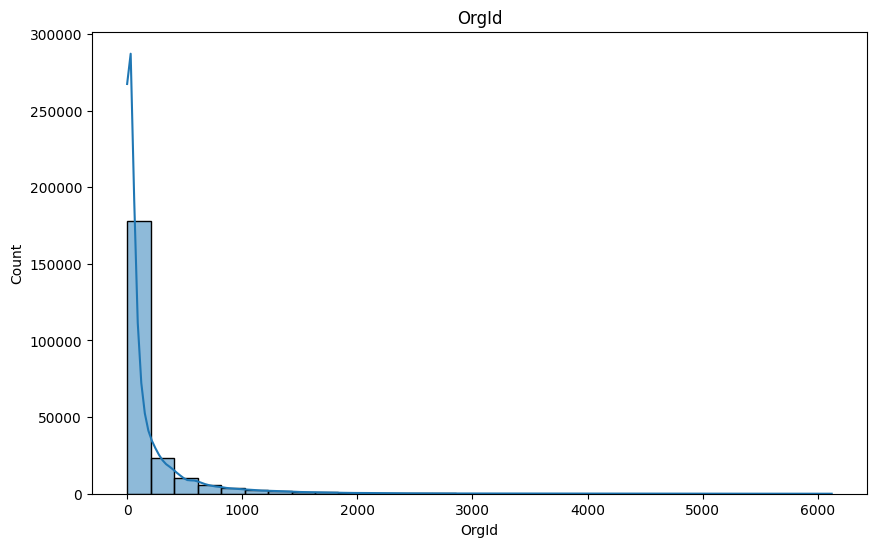

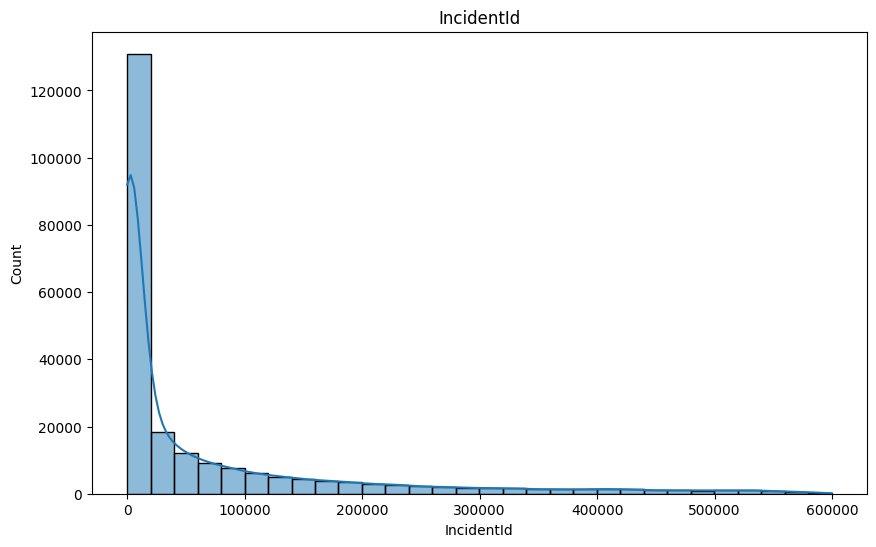

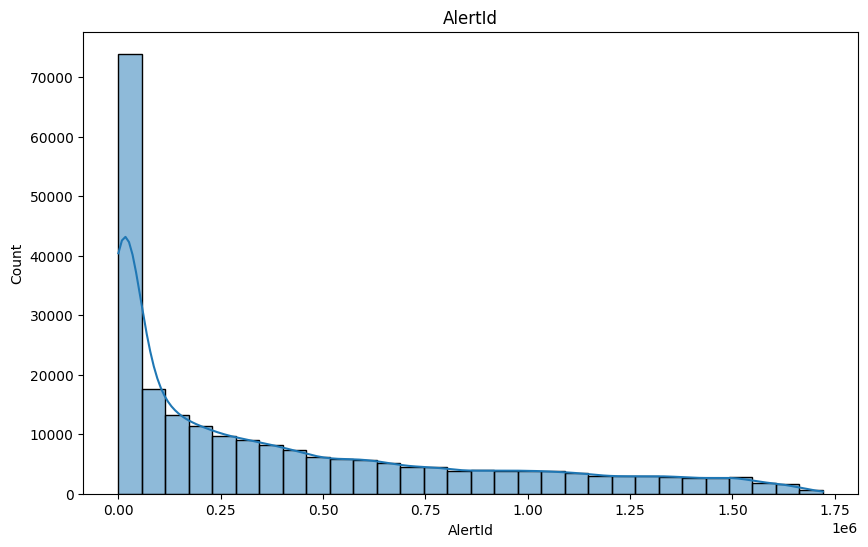

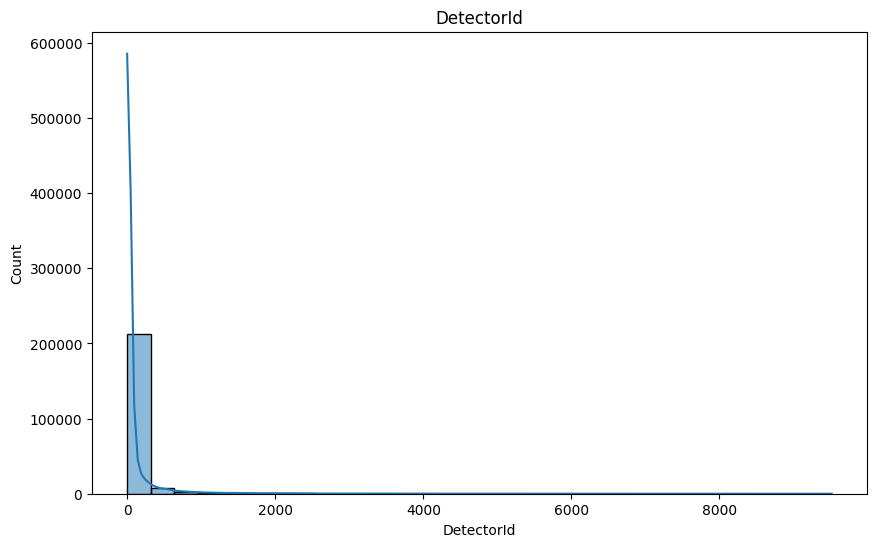

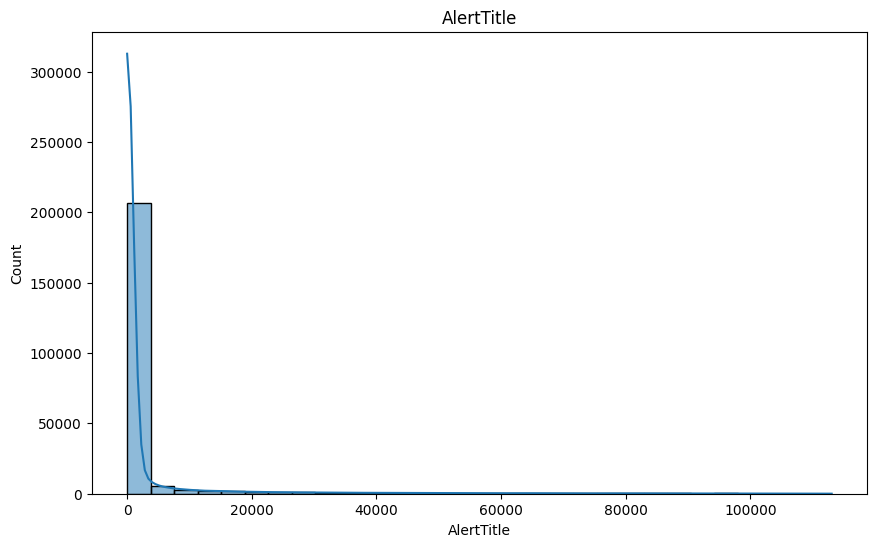

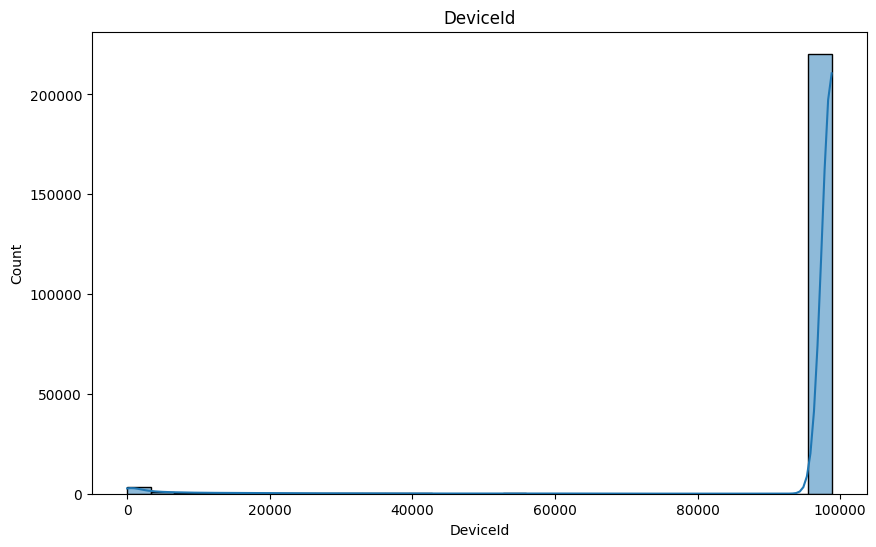

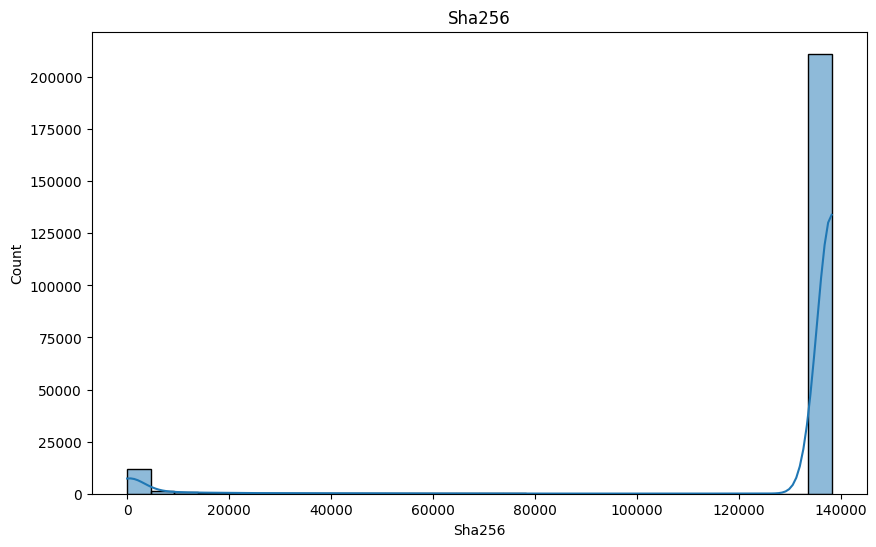

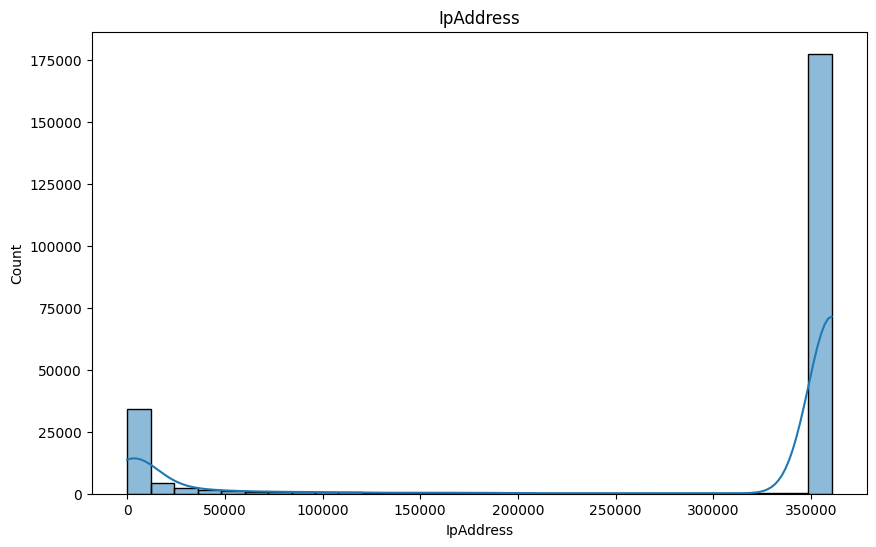

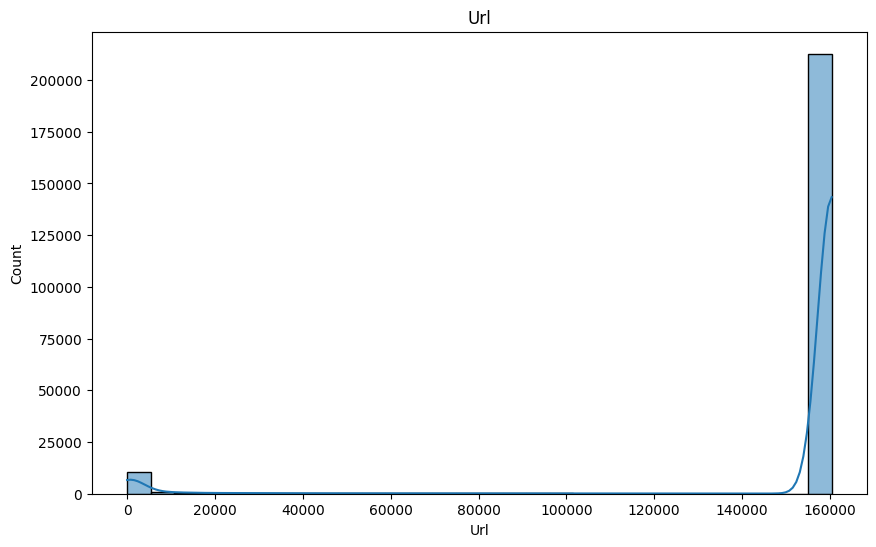

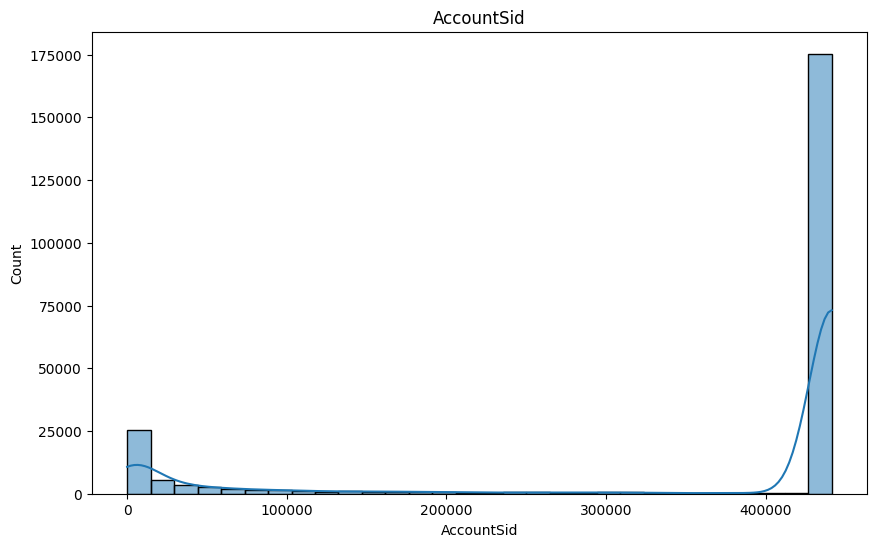

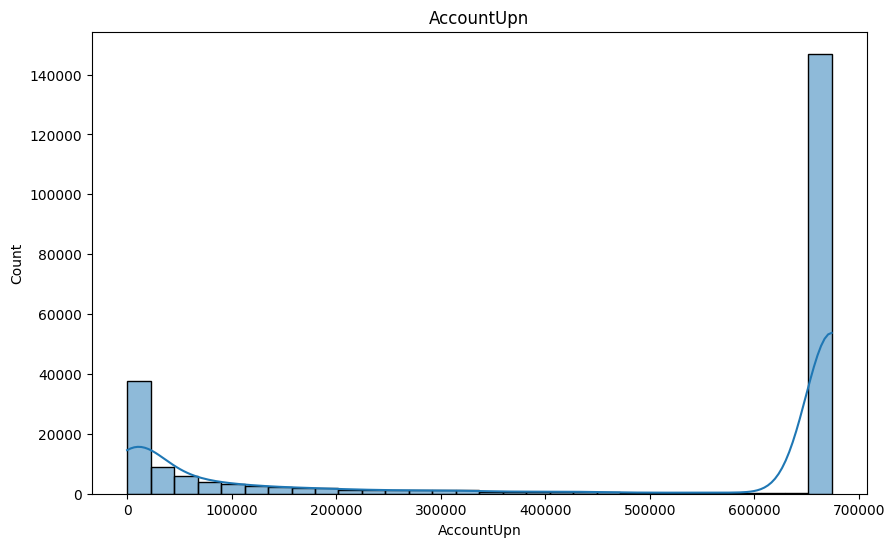

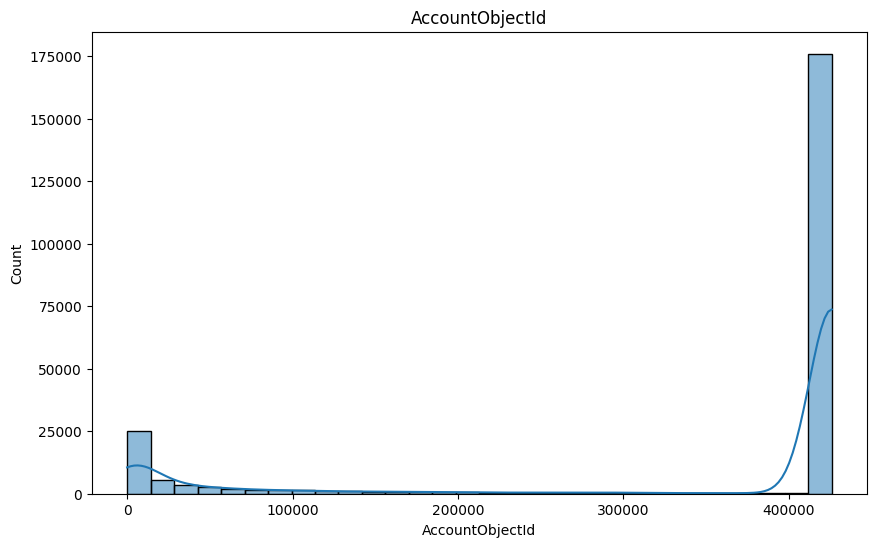

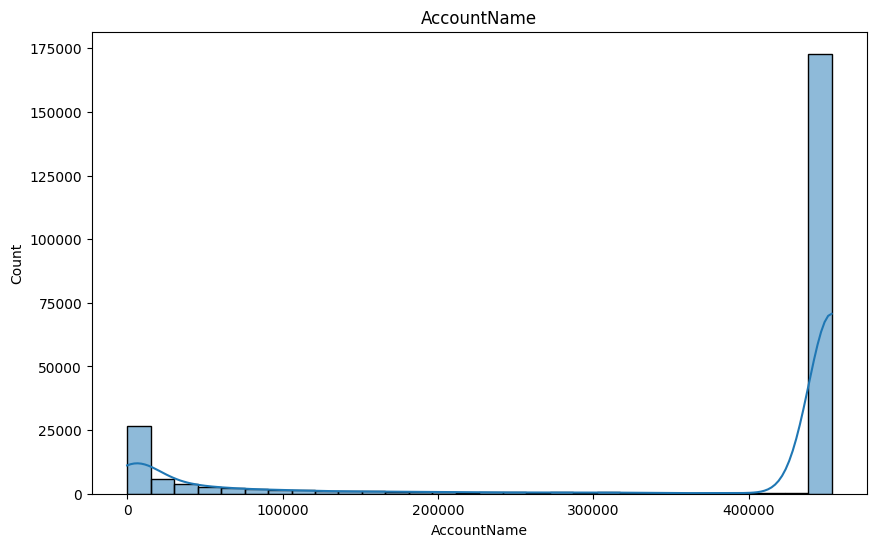

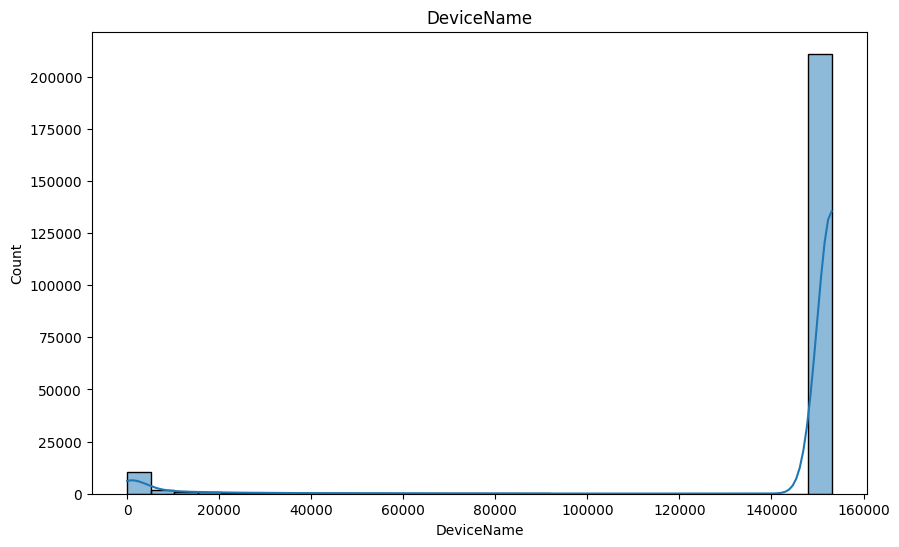

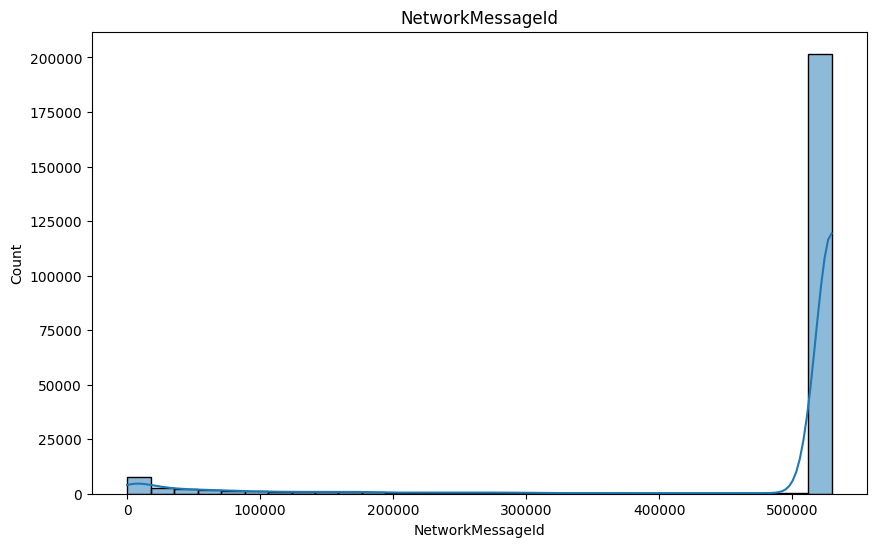

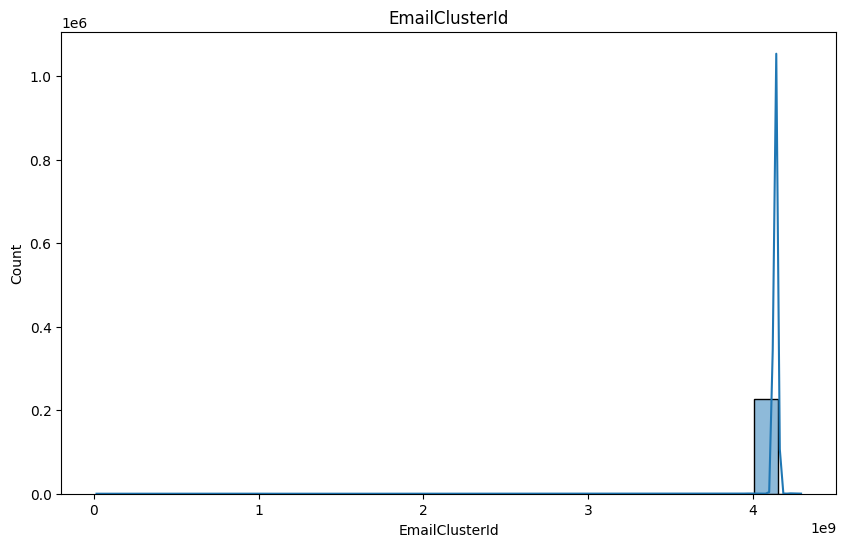

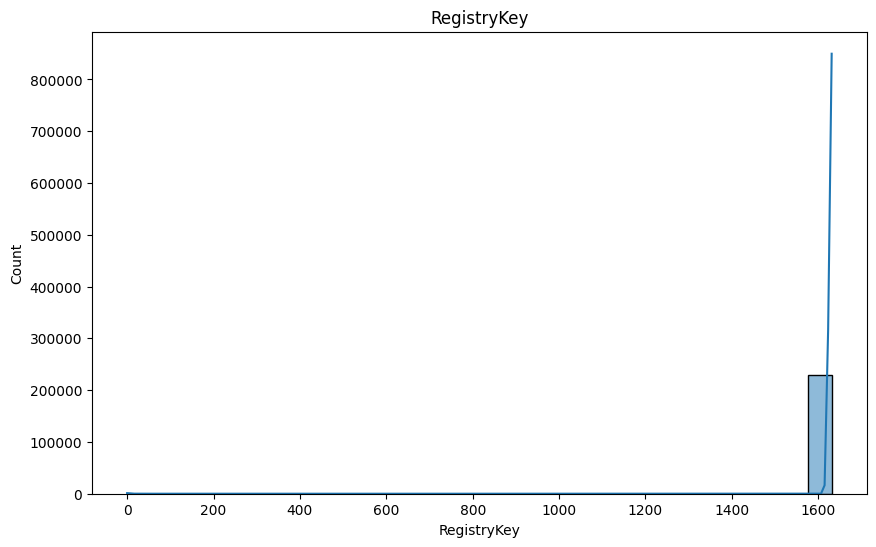

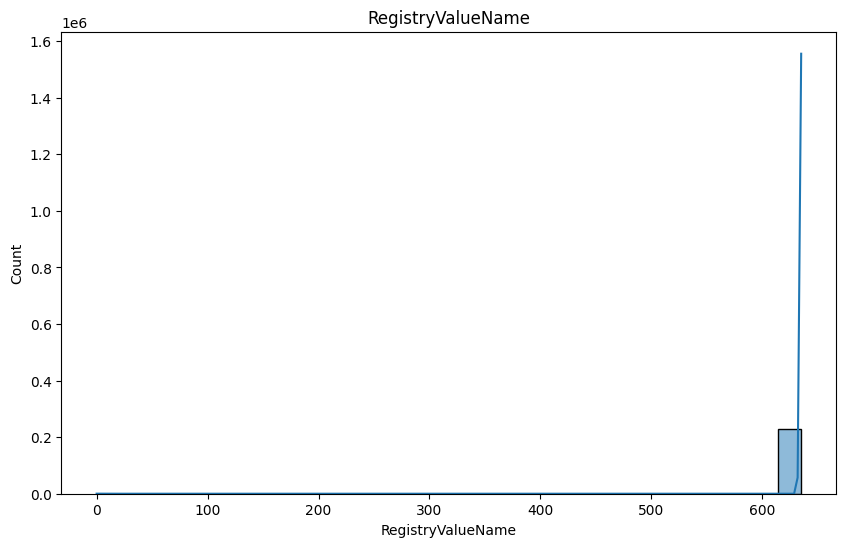

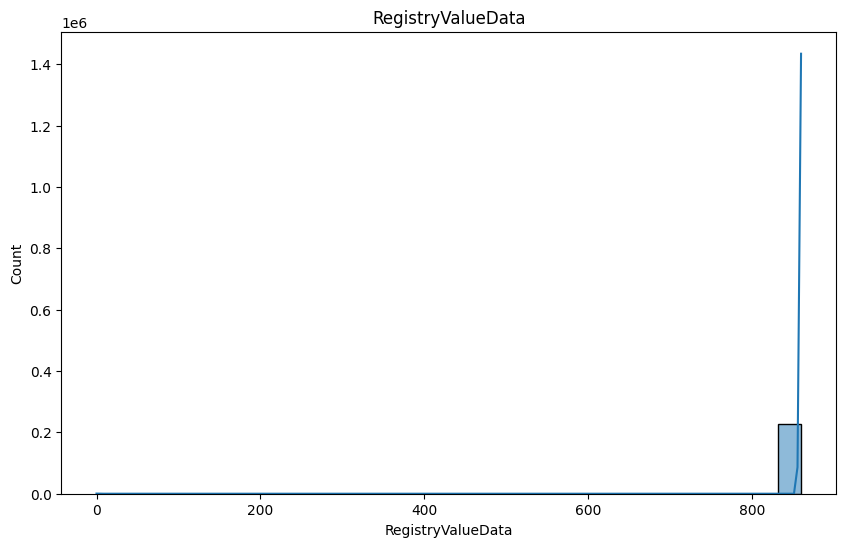

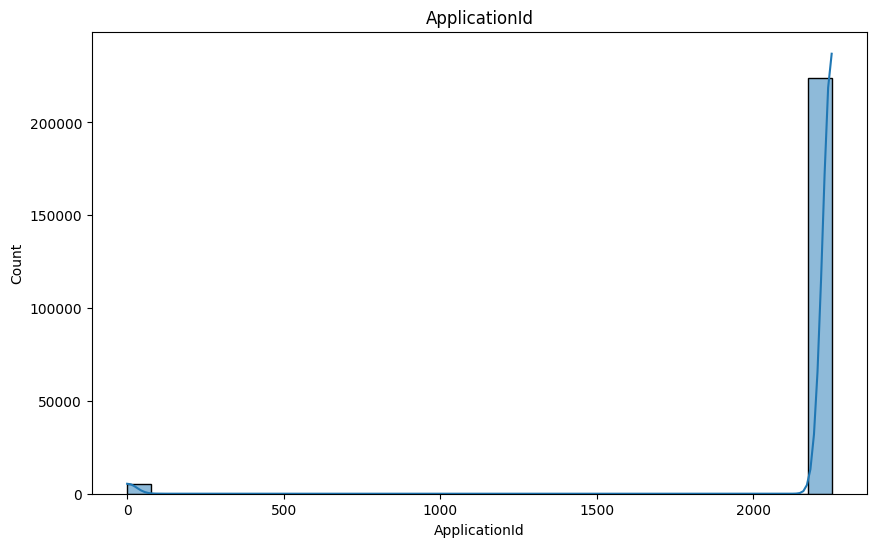

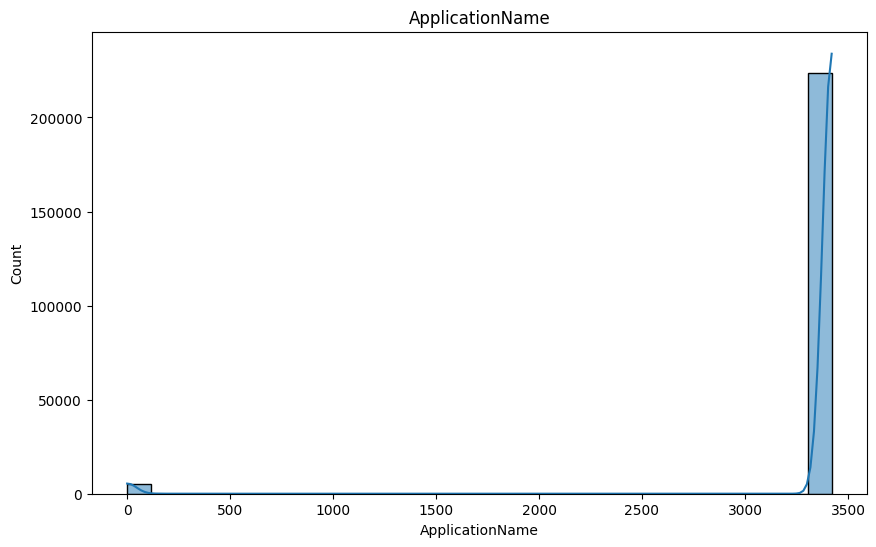

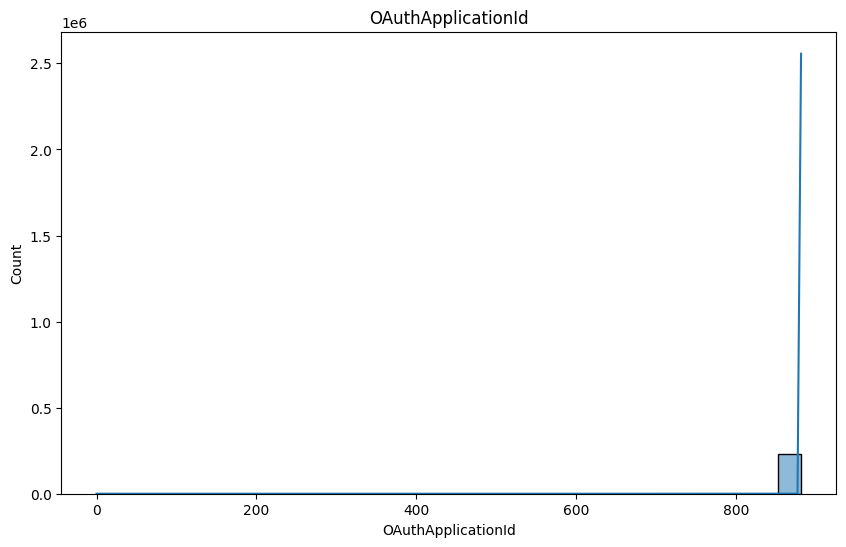

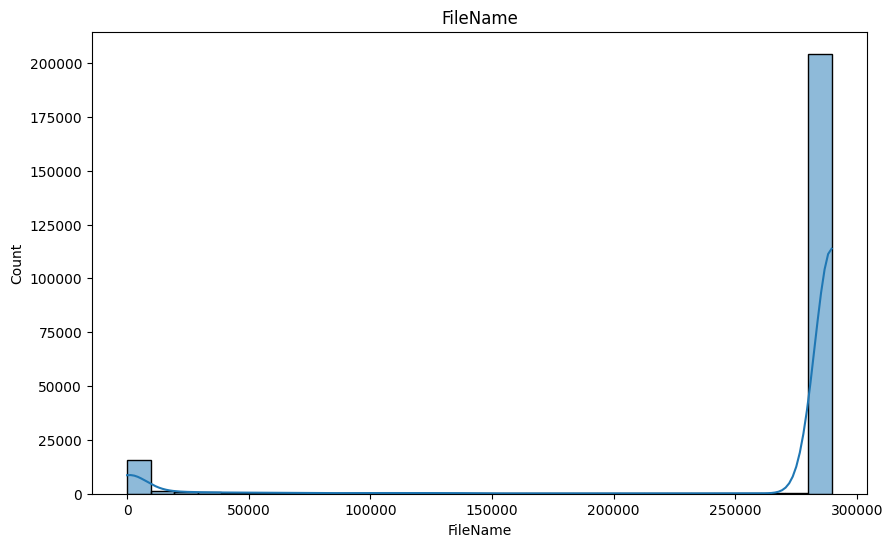

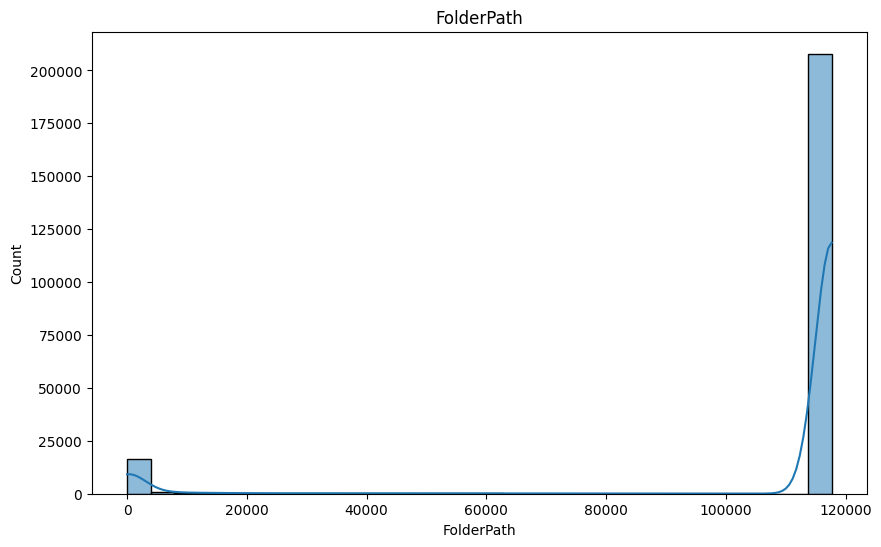

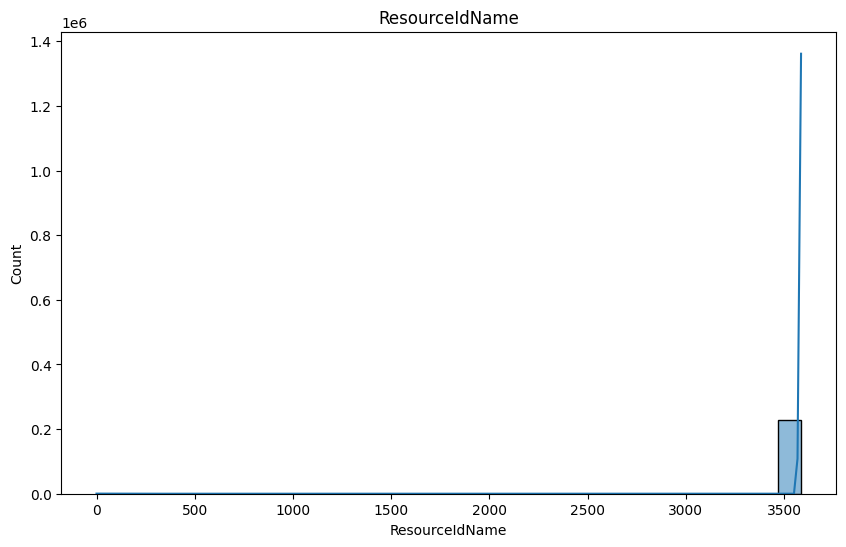

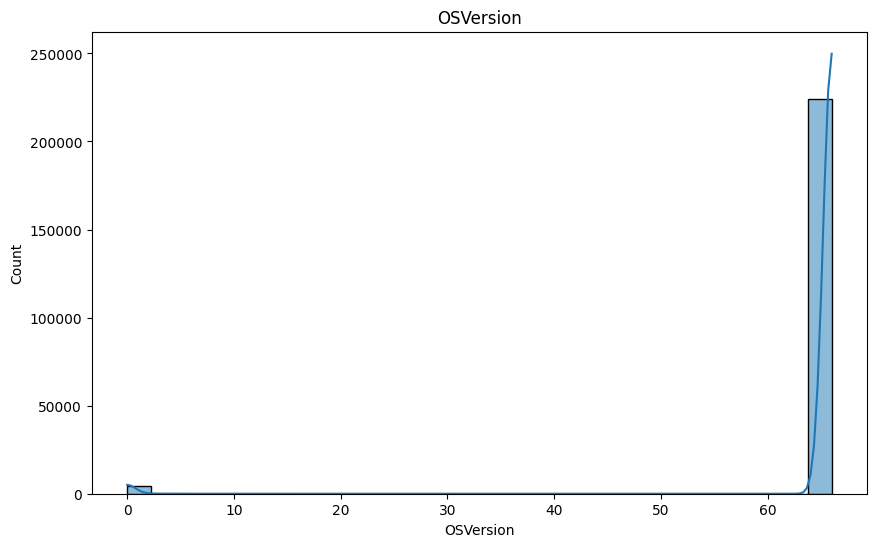

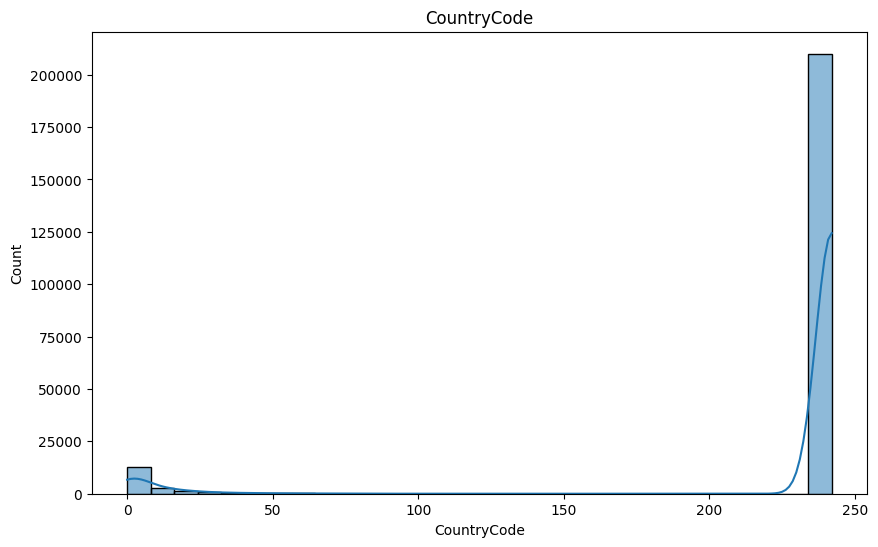

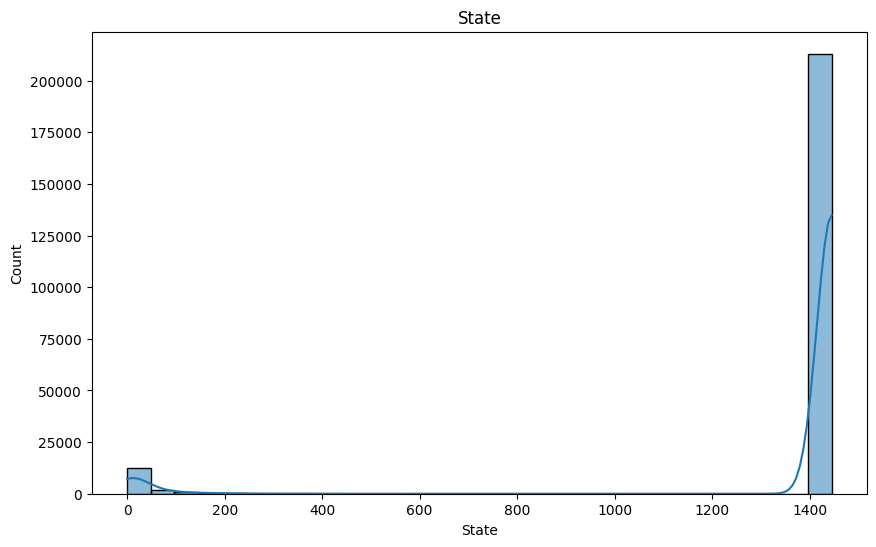

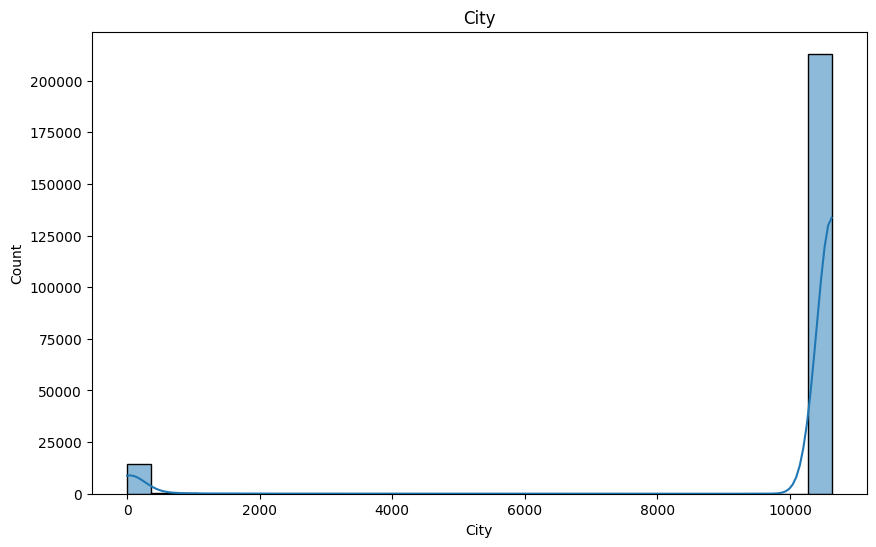

In [20]:
num_col = merged_df.select_dtypes(include=np.number).columns

for col in num_col:
  plt.figure(figsize=(10, 6))
  sns.histplot(merged_df[col], kde=True, bins=30)
  plt.title(col)
  plt.show()

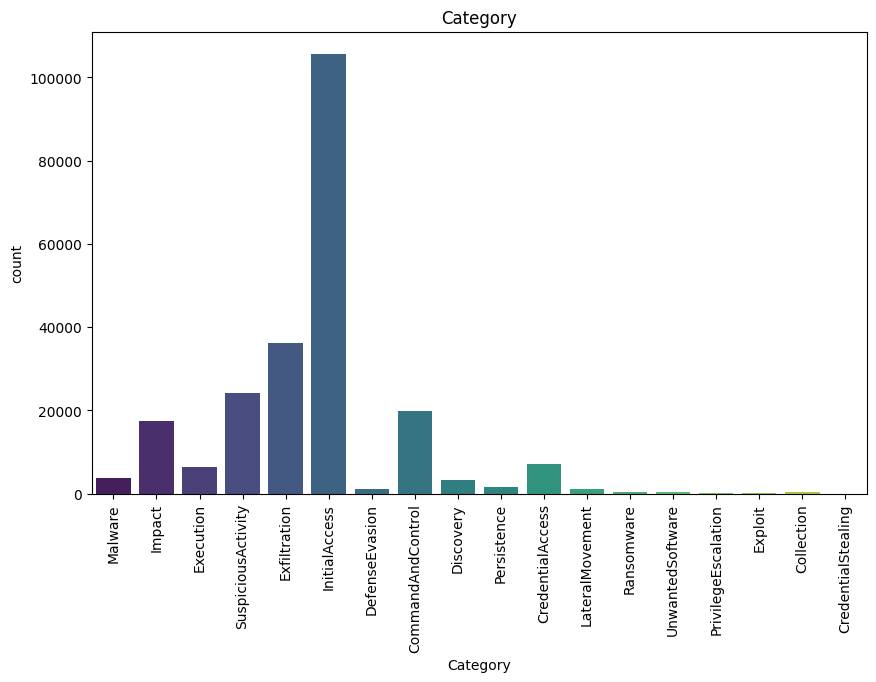

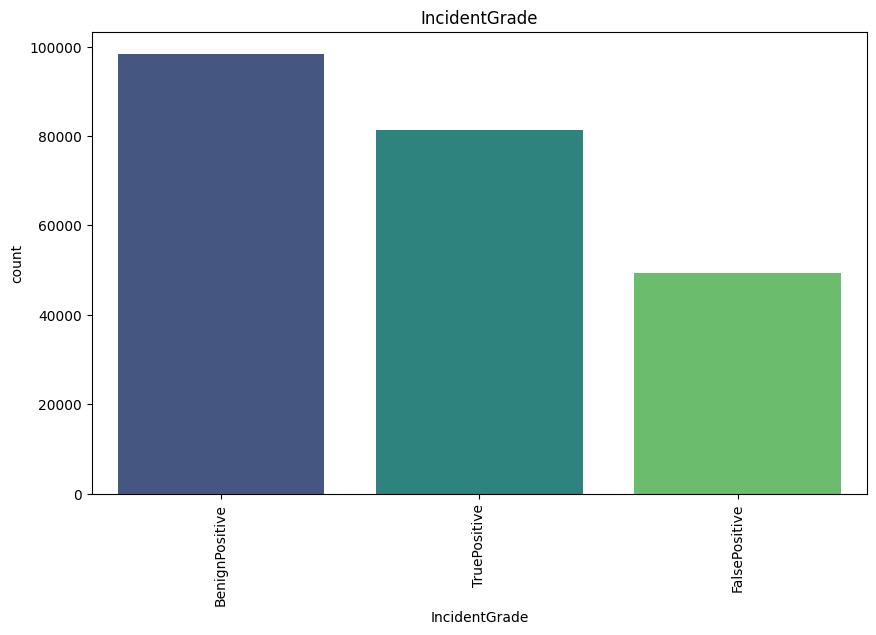

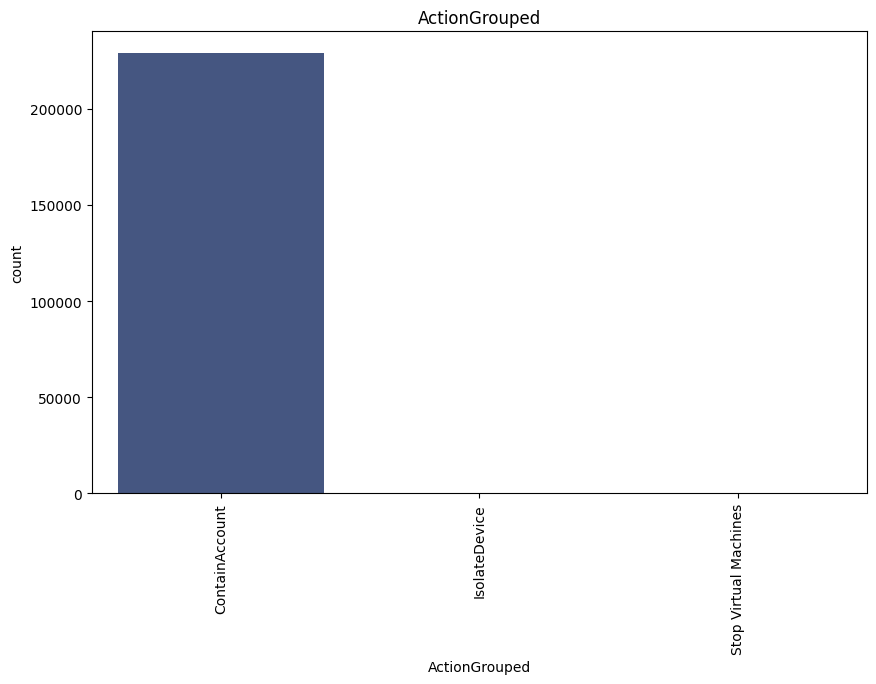

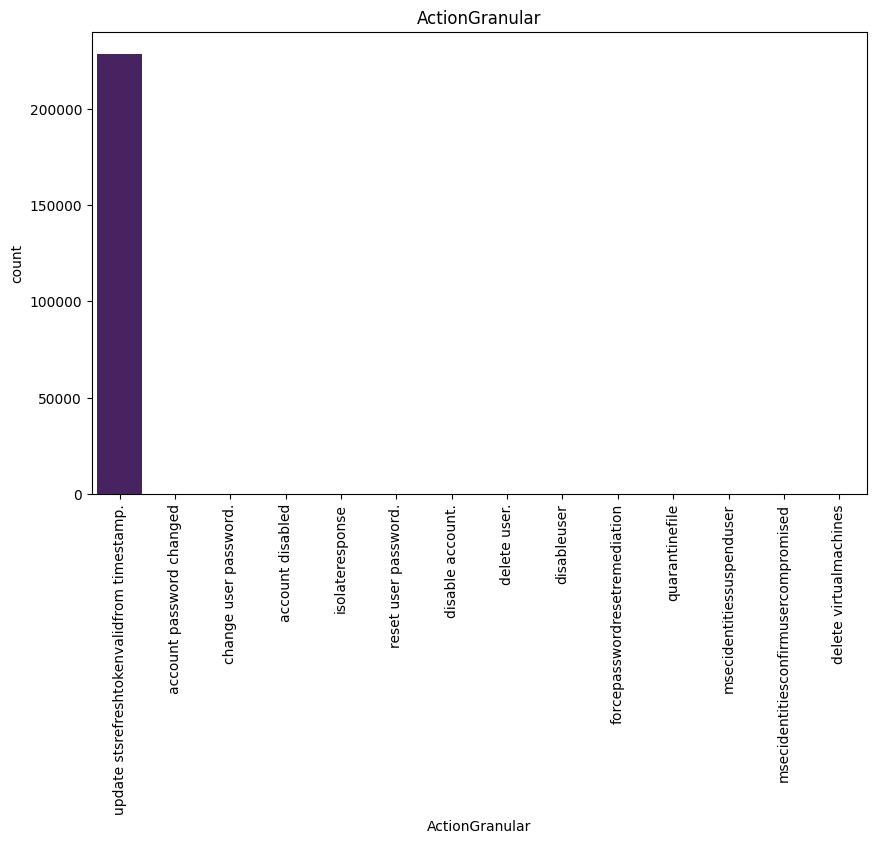

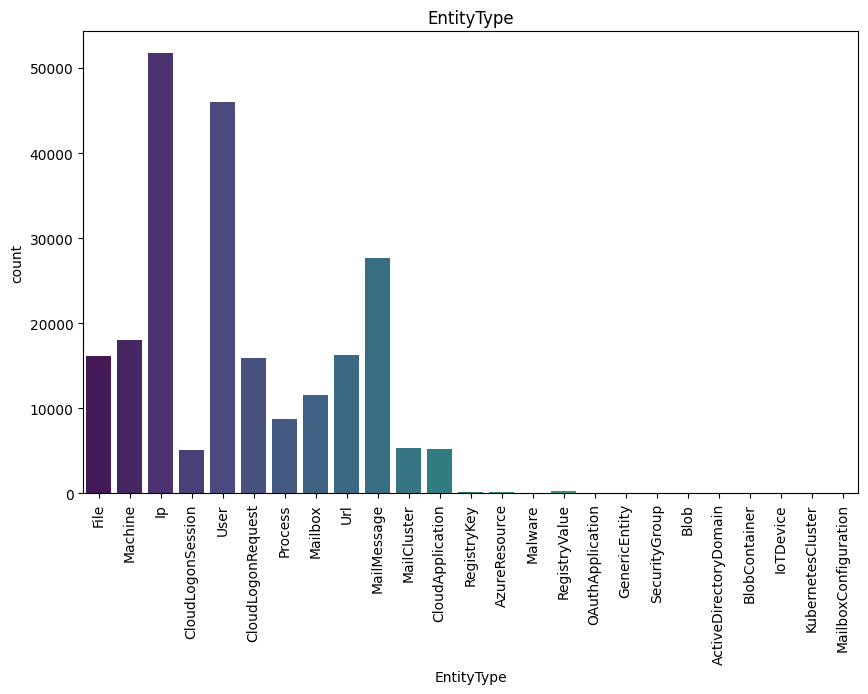

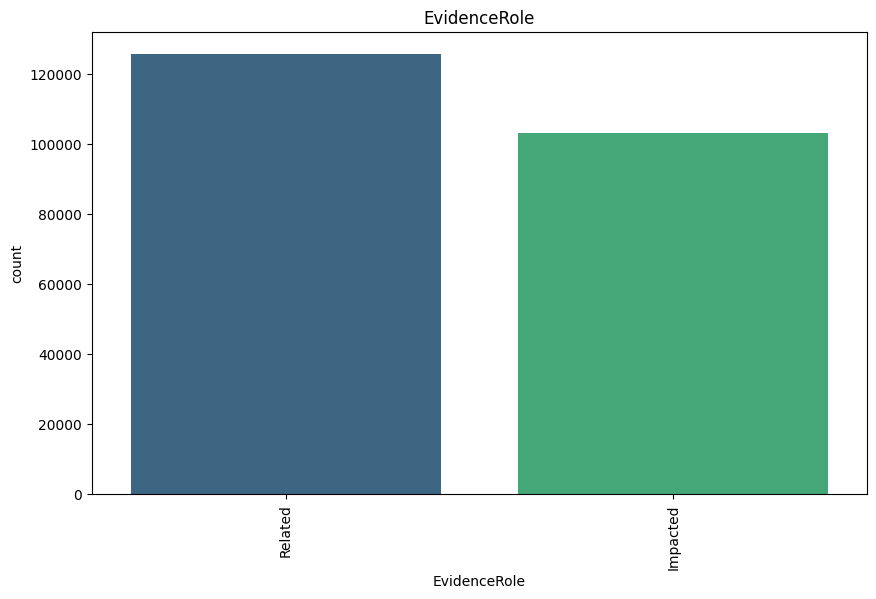

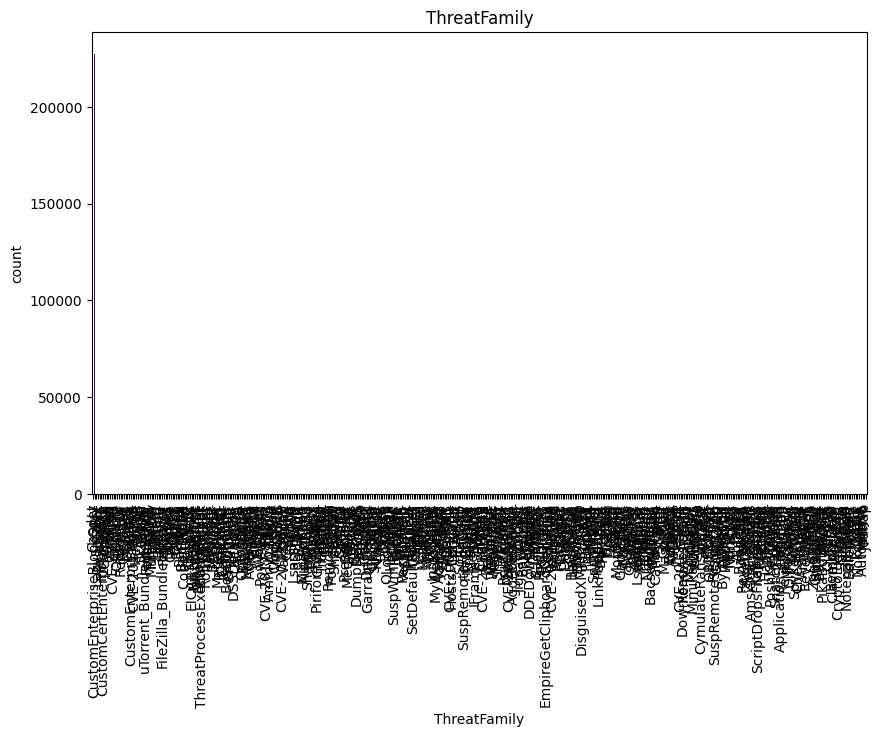

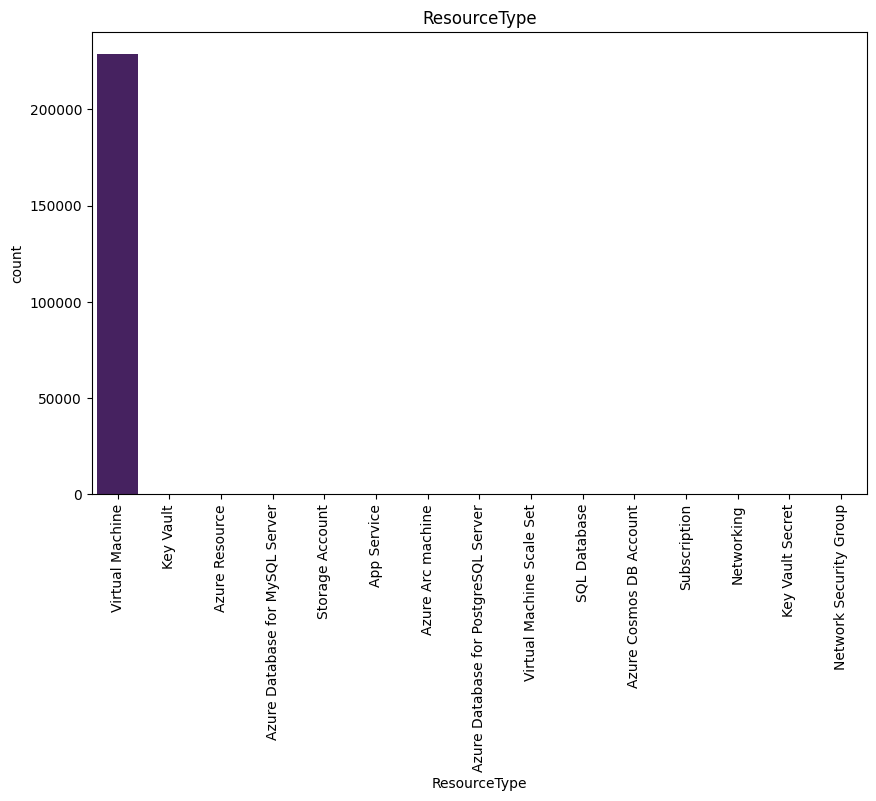

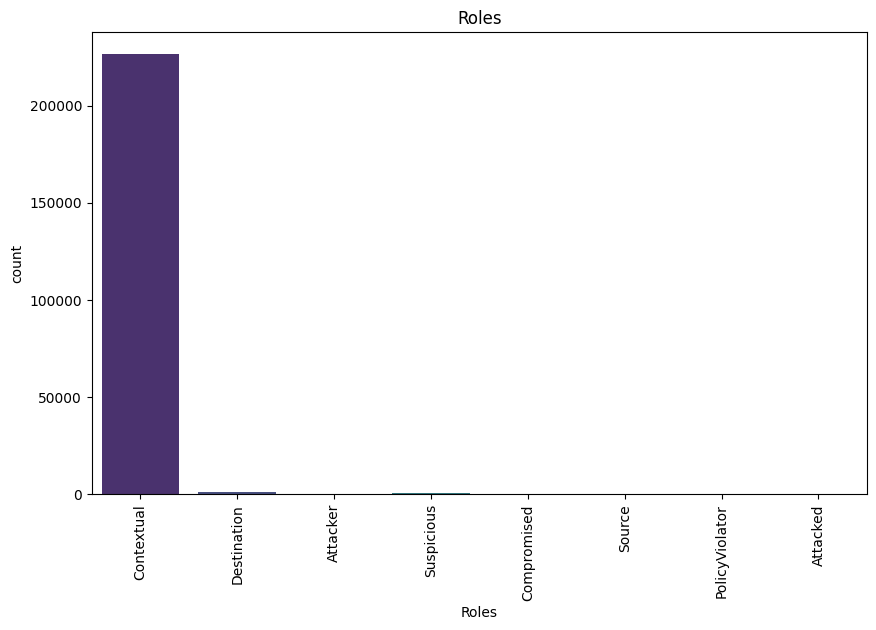

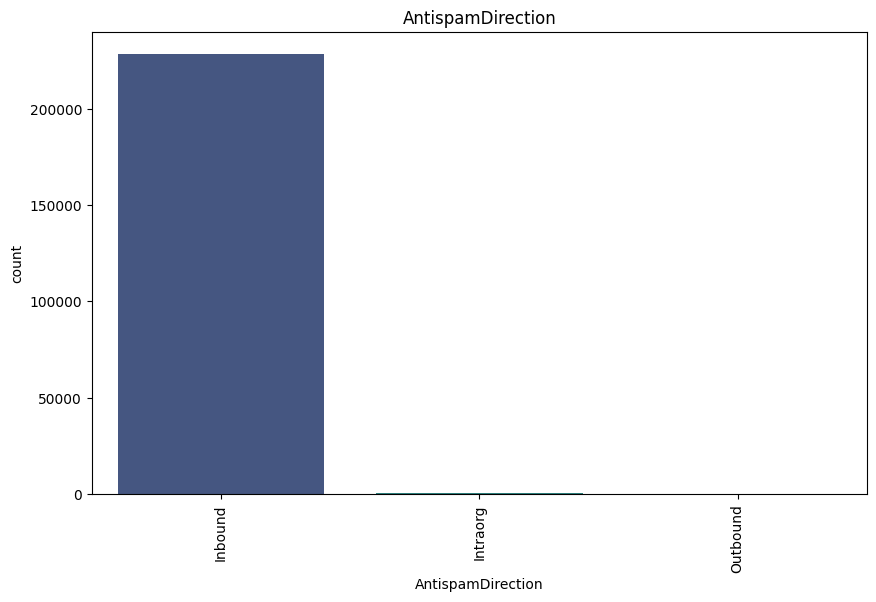

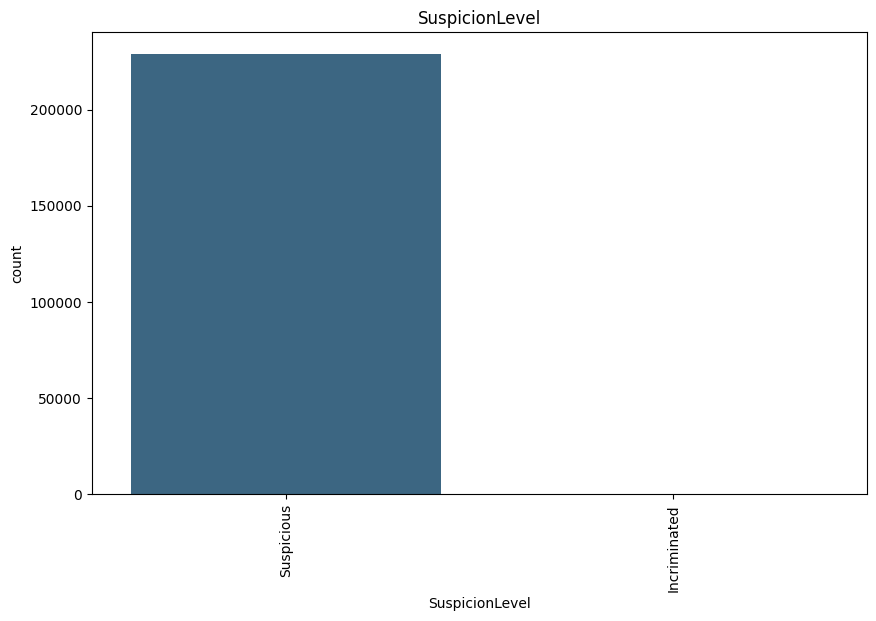

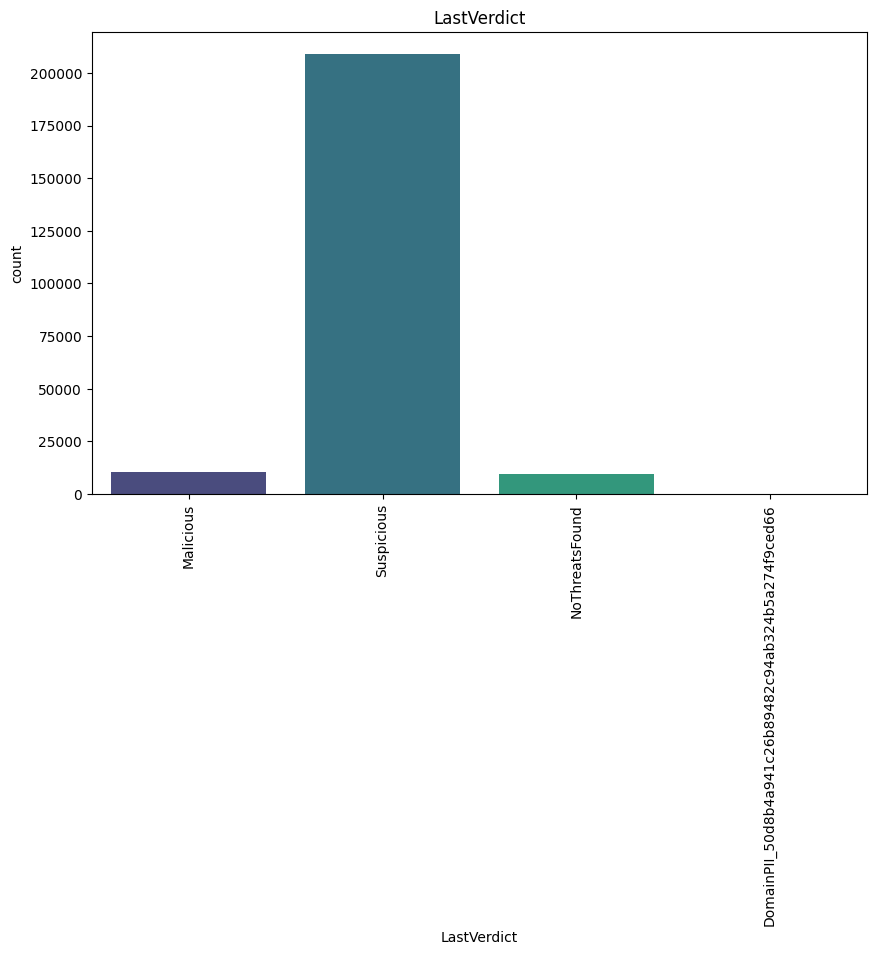

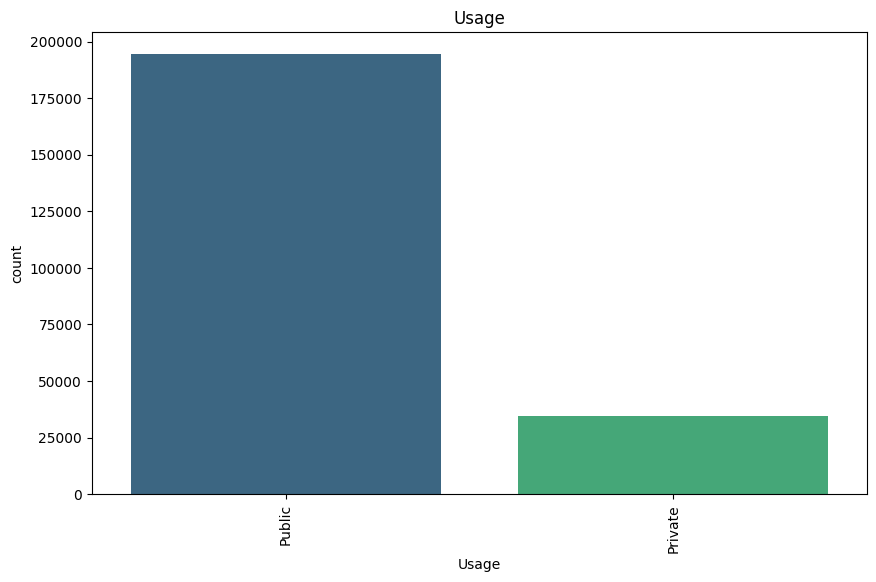

In [21]:
cat_col = merged_df.select_dtypes(include='object').columns

for col in cat_col:
  plt.figure(figsize=(10,6))
  sns.countplot(x=col,data=merged_df, palette="viridis")
  plt.title(col)
  plt.xticks(rotation=90)
  plt.show()


# **Bivariate Analysis**

**Numerical vs Target (if classification)  &  Categorical vs Target**

In [22]:
merged_df.head(2)

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,ActionGrouped,ActionGranular,EntityType,...,ResourceType,Roles,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,26,18583.0,687462.0,31.0,813.0,Malware,BenignPositive,ContainAccount,update stsrefreshtokenvalidfrom timestamp.,File,...,Virtual Machine,Contextual,66.0,Inbound,Suspicious,Malicious,242.0,1445.0,10630.0,Public
1,33,5065.0,3990.0,38.0,25.0,Impact,BenignPositive,ContainAccount,update stsrefreshtokenvalidfrom timestamp.,Machine,...,Virtual Machine,Contextual,66.0,Inbound,Suspicious,Suspicious,242.0,1445.0,10630.0,Public


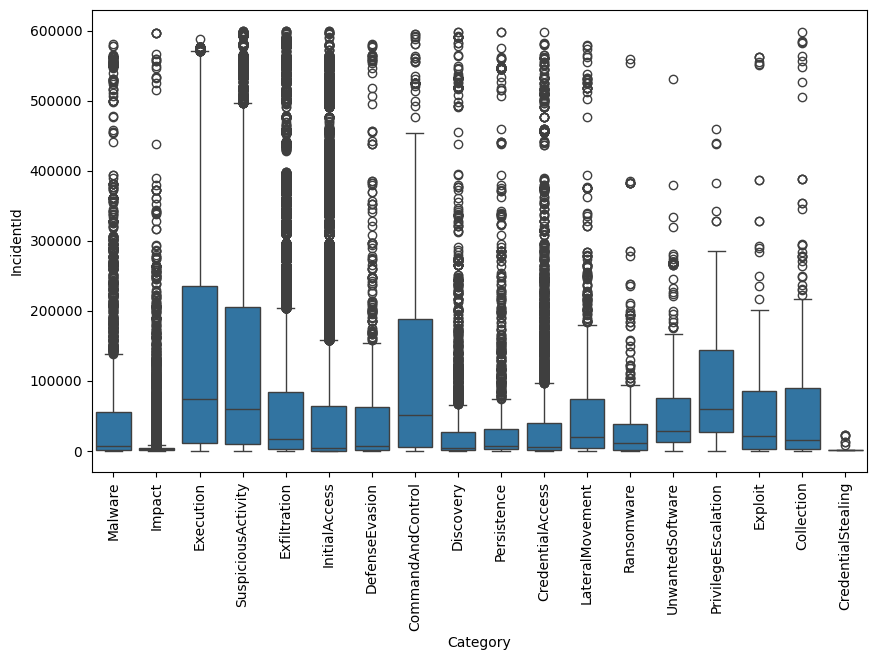

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Category',y='IncidentId', data=merged_df)
plt.xticks(rotation=90)
plt.show()

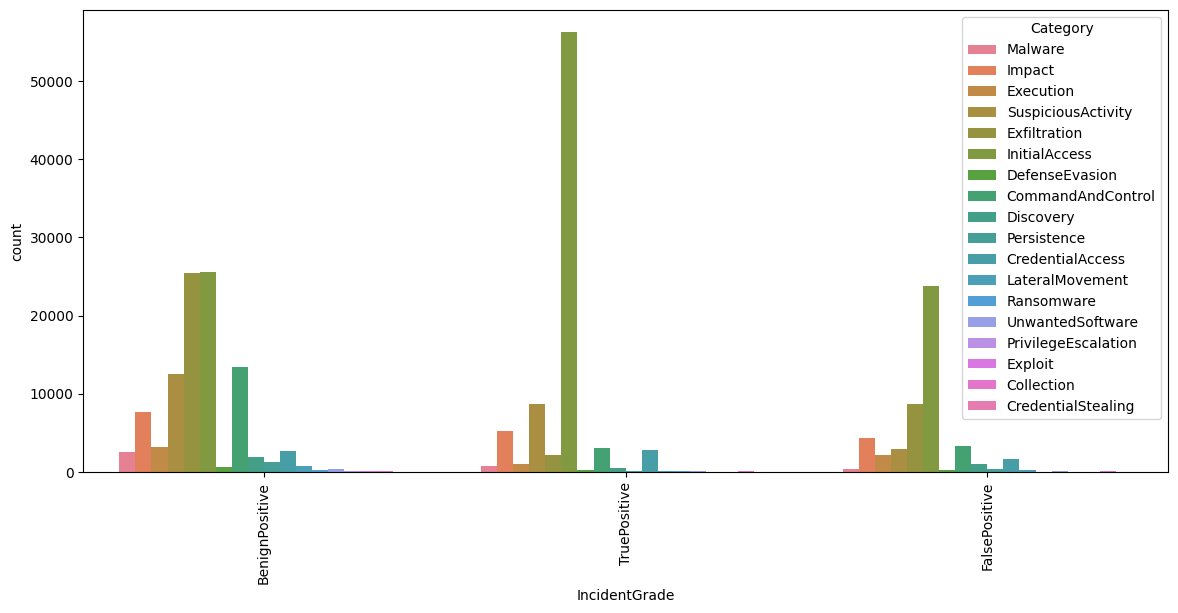

In [24]:
plt.figure(figsize=(14,6))
sns.countplot(x='IncidentGrade',hue='Category',data=merged_df)
plt.xticks(rotation=90)
plt.show()

# **Correlation Analysis (numerical Feature)**

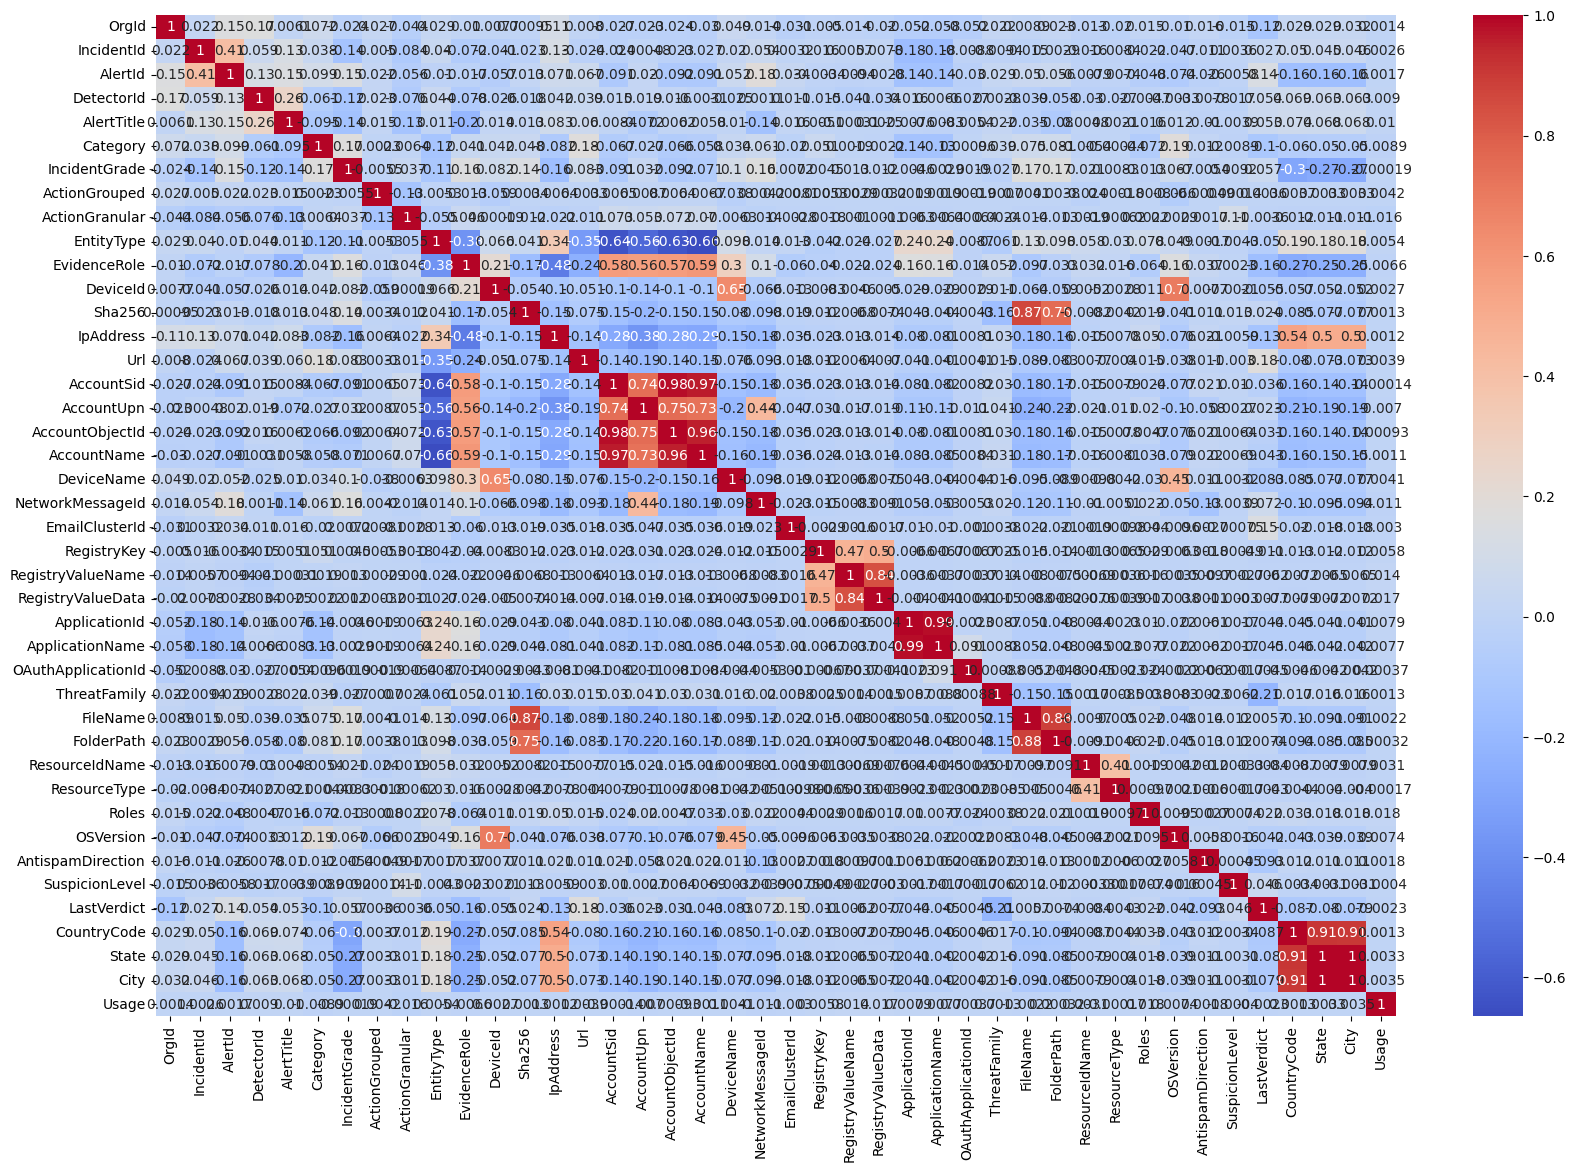

In [25]:
# Convert categorical columns to numeric using label encoding
from sklearn.preprocessing import LabelEncoder

encoded_df = merged_df.copy()
for col in encoded_df.select_dtypes(include=['object']).columns:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col].astype(str))

plt.figure(figsize=(20,13))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [26]:
encoded_df.head(2)

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,ActionGrouped,ActionGranular,EntityType,...,ResourceType,Roles,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,26,18583.0,687462.0,31.0,813.0,12,0,0,13,7,...,13,3,66.0,0,1,1,242.0,1445.0,10630.0,1
1,33,5065.0,3990.0,38.0,25.0,9,0,0,13,12,...,13,3,66.0,0,1,3,242.0,1445.0,10630.0,1


# **Model Selection**

In [27]:
x = encoded_df.drop(columns=['Category'])
y = encoded_df['Category']
#

**Train Model**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
final=RandomForestClassifier(n_estimators=100, random_state=42)
final.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

# **Evaluate Performance**

In [31]:
# Logistic Regression
y_pred_log = final.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.9817832335852519
              precision    recall  f1-score   support

           0       0.92      0.59      0.72        76
           1       1.00      0.99      0.99      3926
           2       0.94      0.93      0.93      1402
           3       1.00      0.75      0.86         8
           4       0.84      0.75      0.79       243
           5       0.93      0.92      0.93       669
           6       0.96      0.96      0.96      1267
           7       0.99      0.99      0.99      7217
           8       0.83      0.26      0.40        19
           9       1.00      0.99      0.99      3504
          10       0.99      1.00      0.99     21209
          11       0.88      0.75      0.81       211
          12       0.92      0.92      0.92       759
          13       0.86      0.79      0.82       315
          14       0.60      0.40      0.48        15
          15       0.80      0.73      0.77        67
          16       0.96      0.9

In [32]:
# RandomForest Classifier
y_pred_rf = final.predict(x_test)
print("Random Forest Classifier:", accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest Classifier: 0.9817832335852519
              precision    recall  f1-score   support

           0       0.92      0.59      0.72        76
           1       1.00      0.99      0.99      3926
           2       0.94      0.93      0.93      1402
           3       1.00      0.75      0.86         8
           4       0.84      0.75      0.79       243
           5       0.93      0.92      0.93       669
           6       0.96      0.96      0.96      1267
           7       0.99      0.99      0.99      7217
           8       0.83      0.26      0.40        19
           9       1.00      0.99      0.99      3504
          10       0.99      1.00      0.99     21209
          11       0.88      0.75      0.81       211
          12       0.92      0.92      0.92       759
          13       0.86      0.79      0.82       315
          14       0.60      0.40      0.48        15
          15       0.80      0.73      0.77        67
          16       0.96      0.98   

In [33]:
# Macro Scores
from sklearn.metrics import f1_score, precision_score, recall_score
print("Macro F1:", f1_score(y_test, y_pred_rf, average="macro"))
print("Macro Precision:", precision_score(y_test, y_pred_rf, average="macro"))
print("Macro Recall:", recall_score(y_test, y_pred_rf, average="macro"))

Macro F1: 0.8363175382849648
Macro Precision: 0.9063635069241545
Macro Recall: 0.7950579176244837


# **Handle Class Imbalance**

In [35]:
rf_balanced = RandomForestClassifier(
    n_estimators=200, class_weight="balanced", random_state=42
)
rf_balanced.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

# **Model Interpretation (Feature Importance)**

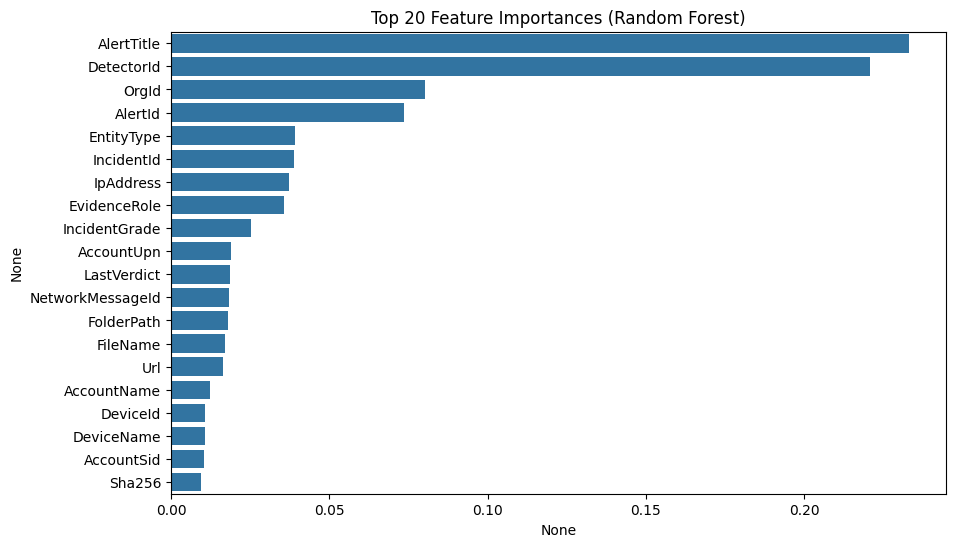

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = final.feature_importances_
indices = x_train.columns

feat_imp = pd.Series(importances, index=indices).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:20], y=feat_imp.index[:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()


# **Error Analysis**

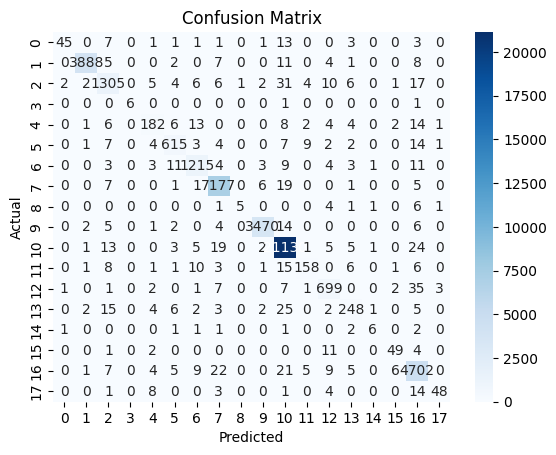

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **Hyperparameter Tuning**

In [40]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {
    #'n_estimators': [100, 200, 300],
    #'max_depth': [None, 10, 20, 30],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4]
#}

#grid_search = GridSearchCV(
    #estimator=final,
    #param_grid=param_grid,
    #cv=3,
    #scoring='f1_macro',
    #n_jobs=-1,
   #verbose=2
#)

#grid_search.fit(x_train, y_train)

#print("Best Parameters:", grid_search.best_params_)
#best_rf = grid_search.best_estimator_


# **Compare Models**

In [41]:
models = {"Logistic Regression": final, "Random Forest": final}

for name, model in models.items():
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name}: {acc:.4f}")


Logistic Regression: 0.9818
Random Forest: 0.9818


# **Save the model**

In [46]:
import joblib

# Save the model
joblib.dump(final, 'random_forest_model.pkl')

print("✅ Model saved successfully as random_forest_model.pkl!")

✅ Model saved successfully as random_forest_model.pkl!
